In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 6.1 MB/s eta 0:00:00


✅ KNN Regression: MAE = 131.4656, R² = 0.5506
✅ Decision Tree: MAE = 89.5369, R² = 0.6930
✅ Random Forest: MAE = 72.9723, R² = 0.8532
✅ Gradient Boosting: MAE = 67.7315, R² = 0.9004
✅ Extra Trees: MAE = 66.9089, R² = 0.8673
✅ XGBoost: MAE = 60.5958, R² = 0.8938
               Model         MAE        R²
5            XGBoost   60.595795  0.893780
4        Extra Trees   66.908896  0.867304
3  Gradient Boosting   67.731525  0.900438
2      Random Forest   72.972264  0.853232
1      Decision Tree   89.536905  0.693047
0     KNN Regression  131.465595  0.550601


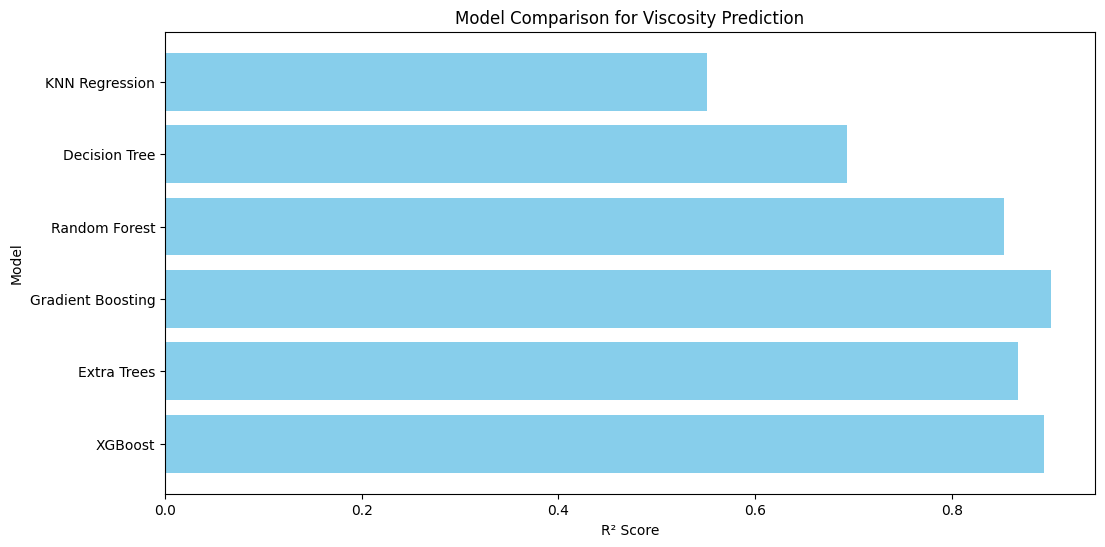

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet, BayesianRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, r2_score

# Load dataset
file_path = "/content/VISCOSITY.csv"
df = pd.read_csv(file_path)

# Define input features and target
X = df.drop(columns=["viscosity"])  # Drop target variable
y = df["viscosity"]  # Target variable

# Check for missing values
if X.isnull().sum().any() or y.isnull().sum() > 0:
    print("Warning: Missing values detected. Consider handling them before training.")

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define models (removed LightGBM to avoid module errors)
models = {

    "KNN Regression": KNeighborsRegressor(n_neighbors=5),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Extra Trees": ExtraTreesRegressor(n_estimators=100),
    "XGBoost": xgb.XGBRegressor(objective='reg:squarederror'),
}

# Store results
results = []

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append((name, mae, r2))
    print(f"✅ {name}: MAE = {mae:.4f}, R² = {r2:.4f}")

# Convert results to DataFrame and sort by performance
df_results = pd.DataFrame(results, columns=["Model", "MAE", "R²"]).sort_values(by="MAE")
print(df_results)

# Plot Results
plt.figure(figsize=(12, 6))
plt.barh(df_results["Model"], df_results["R²"], color="skyblue")
plt.xlabel("R² Score")
plt.ylabel("Model")
plt.title("Model Comparison for Viscosity Prediction")
plt.show()


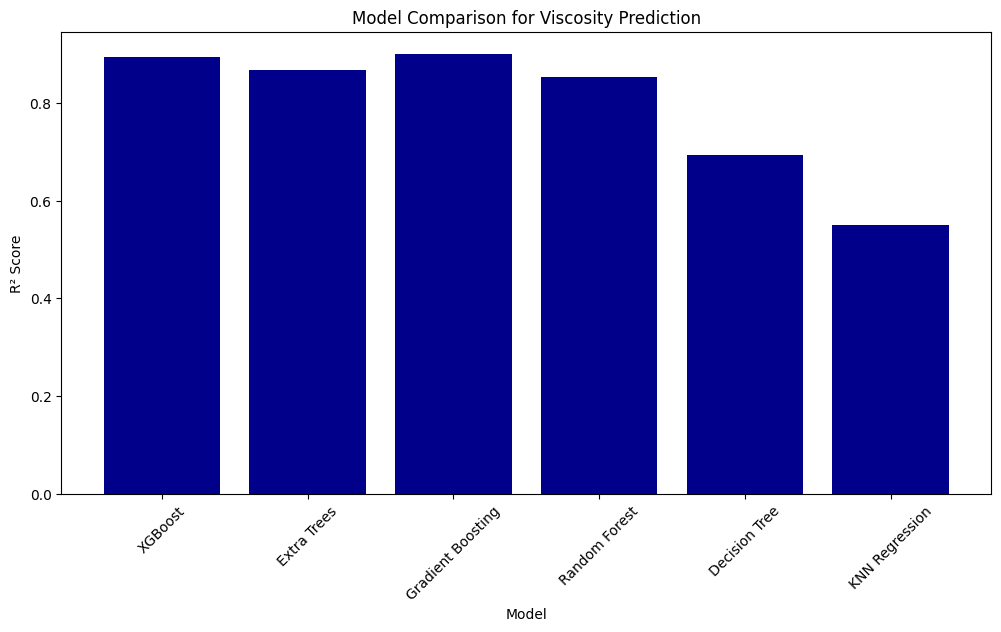

In [ ]:
# Plot Results
plt.figure(figsize=(12, 6))
plt.bar(df_results["Model"], df_results["R²"], color="darkblue")  # Use plt.bar() for vertical bars
plt.xlabel("Model")
plt.ylabel("R² Score")
plt.title("Model Comparison for Viscosity Prediction")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.show()

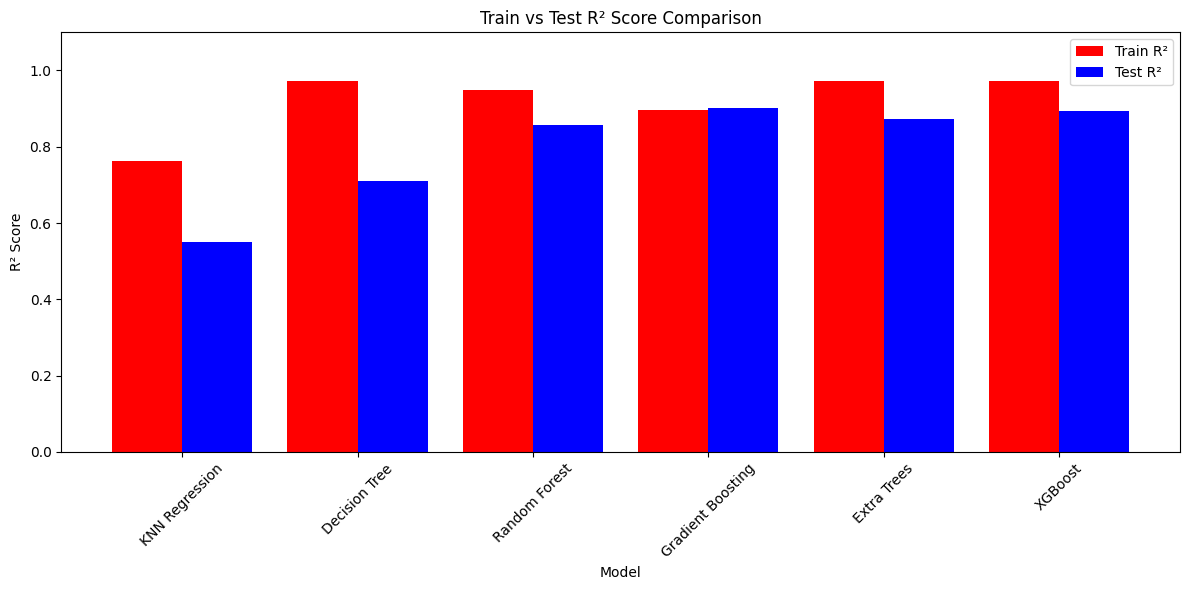

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Train and evaluate models separately for train and test R² scores
train_r2_scores = []
test_r2_scores = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    train_r2_scores.append(train_r2)
    test_r2_scores.append(test_r2)

# Create a grouped bar chart
x = np.arange(len(models))
width = 0.4

plt.figure(figsize=(12, 6))
plt.bar(x - width/2, train_r2_scores, width, label="Train R²", color="red")
plt.bar(x + width/2, test_r2_scores, width, label="Test R²", color="blue")

# Labels and Formatting
plt.xlabel("Model")
plt.ylabel("R² Score")
plt.title("Train vs Test R² Score Comparison")
plt.xticks(x, models.keys(), rotation=45)
plt.legend()
plt.ylim(0, 1.1)  # Keep the scale from 0 to 1.1 for better visualization

# Show the plot
plt.tight_layout()
plt.show()

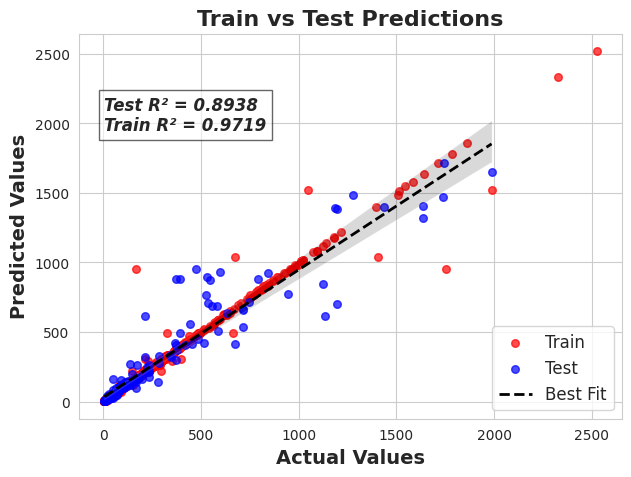

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

# Set Seaborn style
sns.set_style("whitegrid")

# Create figure
plt.figure(figsize=(7, 5))

# Scatter plots for train and test data
plt.scatter(y_train, y_train_pred, color="red", label="Train", alpha=0.7, s=30)
plt.scatter(y_test, y_test_pred, color="blue", label="Test", alpha=0.7, s=30)

# Best-fit regression line
sns.regplot(x=y_test, y=y_test_pred, scatter=False, color="black", line_kws={"linestyle": "--", "linewidth": 2}, label="Best Fit")

# Labels and title
plt.xlabel("Actual Values", fontsize=14, fontweight='bold')
plt.ylabel("Predicted Values", fontsize=14, fontweight='bold')
plt.title("Train vs Test Predictions", fontsize=16, fontweight='bold')

# Compute R² Scores
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Display R² values on the plot (formatted properly)
plt.text(min(y_test), max(y_test)*0.98, f"Test R² = {test_r2:.4f}\nTrain R² = {train_r2:.4f}",
         fontsize=12, fontweight="bold", ha="left", style="italic", bbox=dict(facecolor="white", alpha=0.6, edgecolor="black"))

# Improve legend
plt.legend(fontsize=12, loc="lower right")

# Show plot
plt.show()

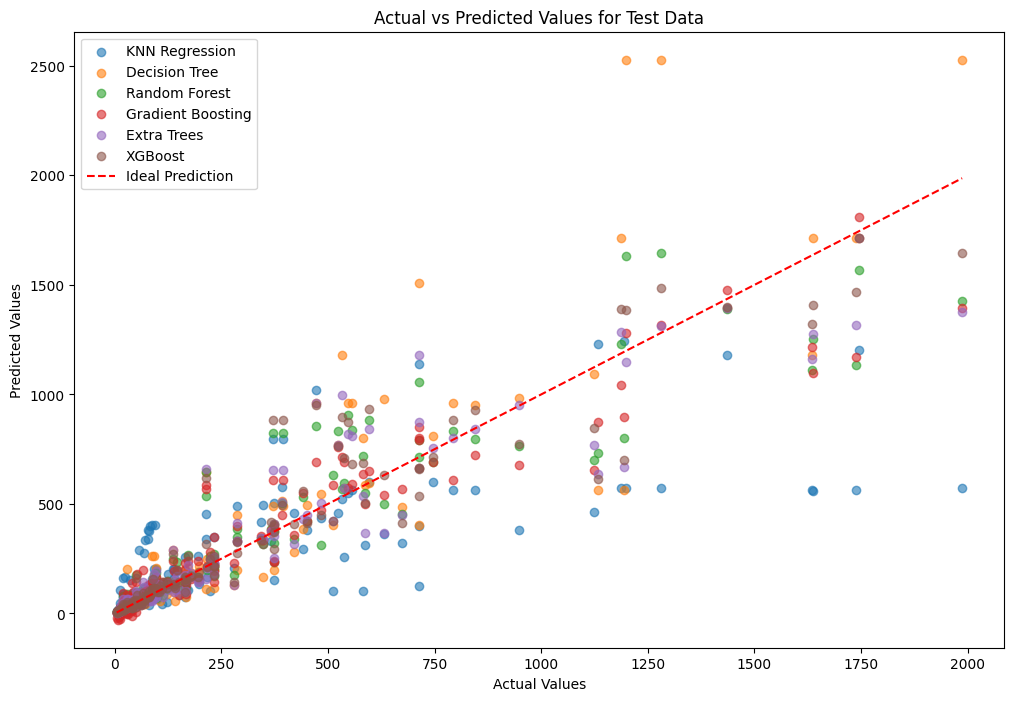


Test Data Performance Metrics:
               Model         MAE           MSE        RMSE        R²
5            XGBoost   60.595795  16171.307782  127.166457  0.893780
4        Extra Trees   65.419857  19279.416982  138.850340  0.873365
3  Gradient Boosting   67.731525  15157.717069  123.116681  0.900438
2      Random Forest   73.439149  21737.745478  147.437259  0.857218
1      Decision Tree   85.345833  44314.241577  210.509481  0.708926
0     KNN Regression  131.465595  68418.291350  261.568904  0.550601


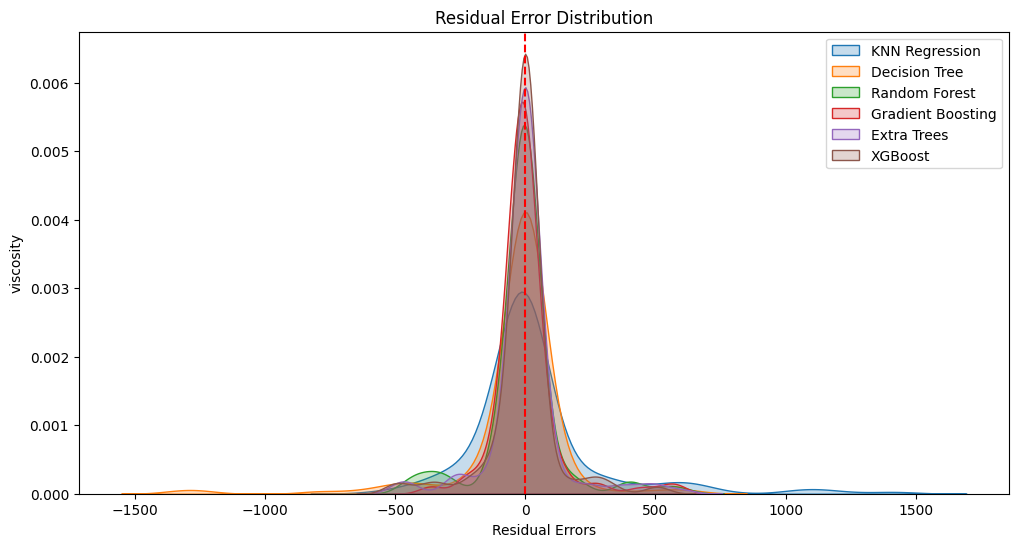

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Function to analyze test data predictions
def evaluate_models(models, X_test, y_test):
    results = []

    plt.figure(figsize=(12, 8))

    for name, model in models.items():
        y_pred = model.predict(X_test)

        # Compute Metrics
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)

        results.append((name, mae, mse, rmse, r2))

        # Scatter plot of Actual vs Predicted
        plt.scatter(y_test, y_pred, alpha=0.6, label=name)

    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--", label="Ideal Prediction")
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title("Actual vs Predicted Values for Test Data")
    plt.legend()
    plt.show()

    # Convert results to DataFrame and display
    df_results = pd.DataFrame(results, columns=["Model", "MAE", "MSE", "RMSE", "R²"]).sort_values(by="MAE")
    print("\nTest Data Performance Metrics:")
    print(df_results)

    # Residual Errors Plot
    plt.figure(figsize=(12, 6))
    for name, model in models.items():
        y_pred = model.predict(X_test)
        residuals = y_test - y_pred
        sns.kdeplot(residuals, label=name, fill=True)

    plt.axvline(0, color='red', linestyle="--")
    plt.xlabel("Residual Errors")
    plt.ylabel("viscosity")
    plt.title("Residual Error Distribution")
    plt.legend()
    plt.show()

# Call the function to analyze test data
evaluate_models(models, X_test, y_test)


Pearson Correlation with Viscosity:
 viscosity     1.000000
nRing         0.340712
nHBDon        0.328616
WPol          0.167167
Zagreb2       0.149525
HBAMF         0.141357
Zagreb1       0.121616
HBDMW         0.068804
nAromAtom     0.022067
nH            0.011421
WPath         0.005440
nRingA       -0.000020
nHBDonA      -0.004082
nRot         -0.035479
nAromAtomA   -0.054874
SLogPA       -0.061839
WPathA       -0.079426
HBA MW       -0.088349
nHA          -0.119928
nRotA        -0.129669
WPolA        -0.135424
Zagreb2A     -0.142195
HBDMF        -0.145806
Zagreb1A     -0.149574
SLogP        -0.294698
Temp         -0.565952
nSpiroA            NaN
nSpiro             NaN
Name: viscosity, dtype: float64

Spearman Correlation with Viscosity:
 viscosity     1.000000
nHBDon        0.407449
nRing         0.361005
HBAMF         0.230640
Zagreb2       0.194372
WPol          0.191047
Zagreb1       0.165422
HBDMW         0.090229
nRingA        0.067305
nAromAtom     0.065884
WPath         0.06

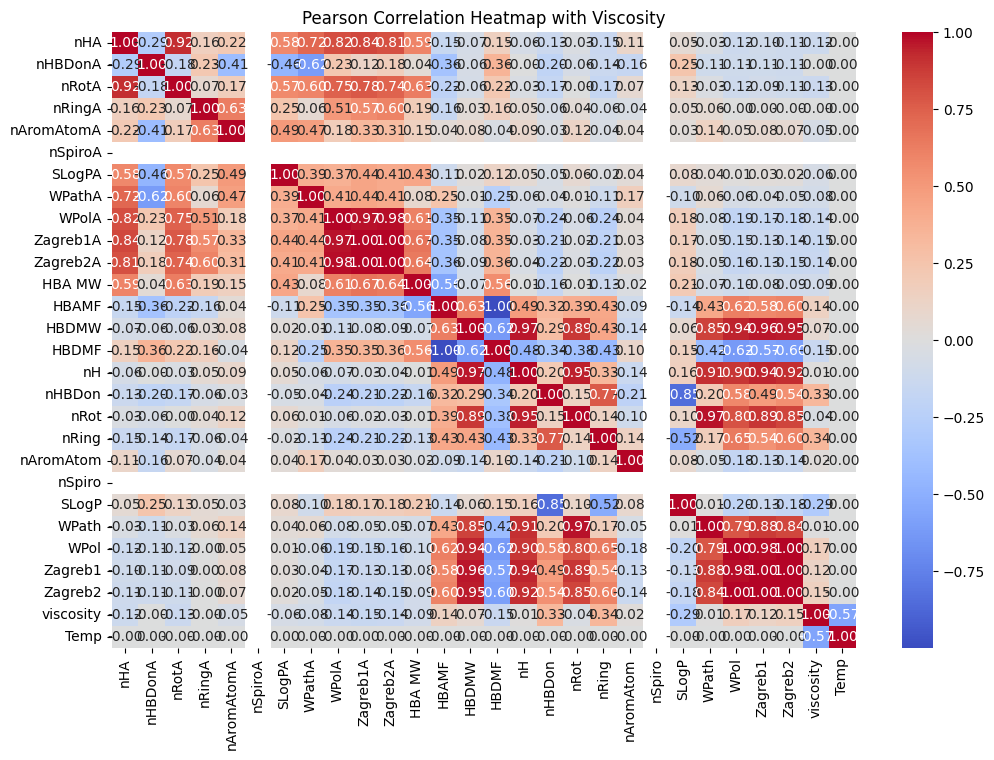

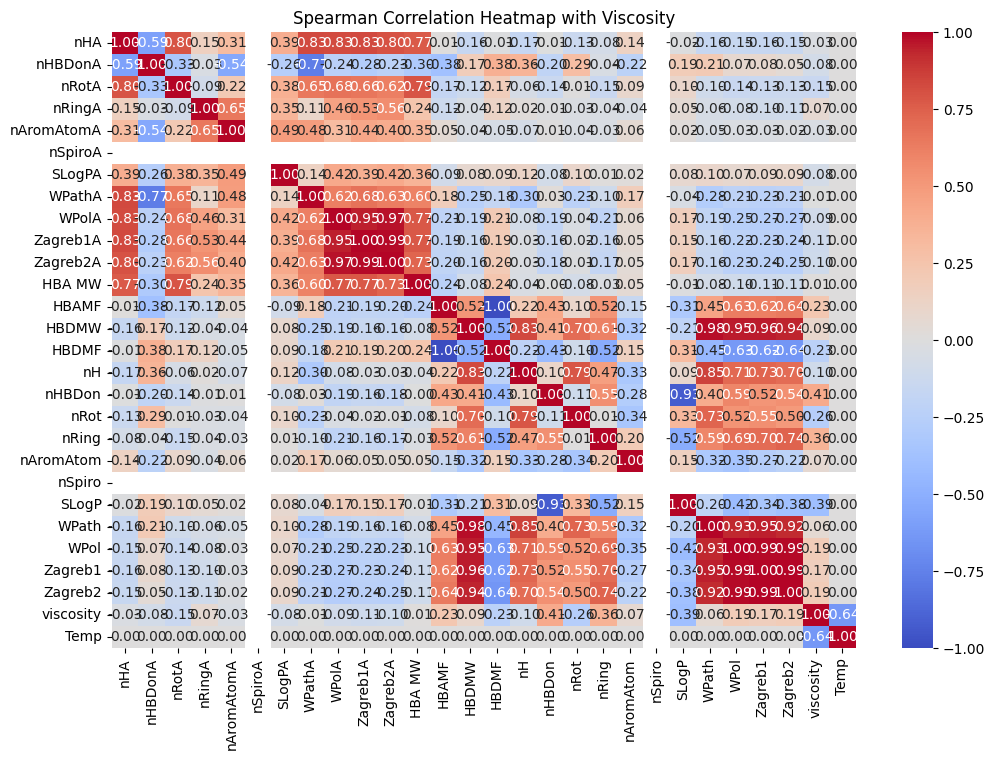

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = "/content/VISCOSITY.csv"
df = pd.read_csv(file_path)

# Ensure 'viscosity' is present in the dataset
if 'viscosity' not in df.columns:
    raise ValueError("The dataset must contain a column named 'viscosity'.")

# Compute Pearson and Spearman correlation with viscosity
pearson_corr = df.corr(method='pearson')['viscosity'].sort_values(ascending=False)
spearman_corr = df.corr(method='spearman')['viscosity'].sort_values(ascending=False)

# Print the top correlated features
print("Pearson Correlation with Viscosity:\n", pearson_corr)
print("\nSpearman Correlation with Viscosity:\n", spearman_corr)

# Plot correlation heatmap (Pearson)
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(method='pearson'), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Pearson Correlation Heatmap with Viscosity")
plt.show()

# Plot correlation heatmap (Spearman)
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(method='spearman'), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Spearman Correlation Heatmap with Viscosity")
plt.show()


In [ ]:
import pandas as pd

# Create a DataFrame with actual and predicted values
results_df = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})

# Display the first few rows
print(results_df.head())


     Actual   Predicted
695     6.8   10.542685
816    55.7   40.911221
30    632.0  633.614197
599    39.7   35.934704
96    523.6  765.311401


In [ ]:
import pandas as pd

# Create a DataFrame with actual and predicted values
results_df = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})

# Display all rows
pd.set_option("display.max_rows", None)  # Ensure all rows are printed
print(results_df)

     Actual    Predicted
695     6.8    10.542685
816    55.7    40.911221
30    632.0   633.614197
599    39.7    35.934704
96    523.6   765.311401
244   392.7   495.401031
558     8.5     5.413566
352   374.3   371.189117
464    43.9    52.302425
543     8.9     9.483069
447    69.4    57.298843
254   365.2   418.004181
250   223.9   248.761429
65   1198.0  1385.287964
668    11.9    15.855956
215   472.4   950.466125
39    597.0   931.806213
192   372.2   295.399658
86   1436.7  1398.942139
493   195.8   165.156616
670    30.2    32.025734
196   347.3   318.422424
209  1193.7   699.992920
212   793.6   882.360596
738    38.4    43.716858
275    42.2    55.456570
120    66.5    94.497368
292    30.6    29.495171
139   121.6   114.104752
291    40.5    25.368563
836     5.3     6.488971
63    536.9   707.320740
618    25.9    25.138535
66   1280.0  1487.454590
533    77.2    76.934174
518    94.1   115.037613
334    87.6    96.174706
328   140.8   115.908600
239   451.8   412.319977


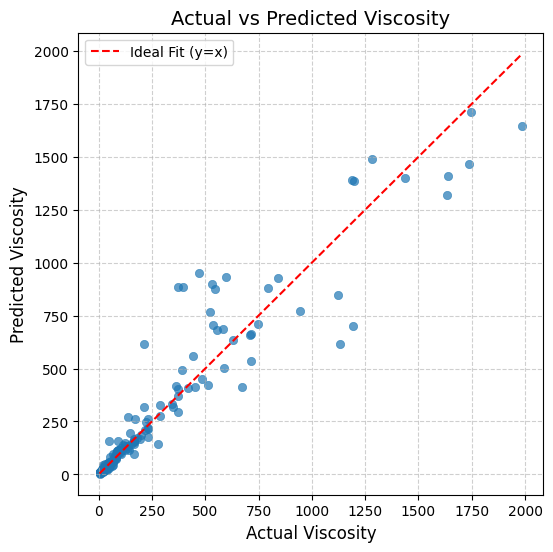

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Ensure y_test and y_pred are available (replace with actual variables)
# y_test = actual viscosity values from dataset
# y_pred = predicted viscosity values from your regression model

# Scatter plot
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7, edgecolor=None)

# Reference diagonal line (Perfect Predictions)
x_vals = np.linspace(min(y_test), max(y_test), 100)
plt.plot(x_vals, x_vals, color='red', linestyle='--', label='Ideal Fit (y=x)')

# Labels and title
plt.xlabel("Actual Viscosity", fontsize=12)
plt.ylabel("Predicted Viscosity", fontsize=12)
plt.title("Actual vs Predicted Viscosity", fontsize=14)

# Show legend and plot
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


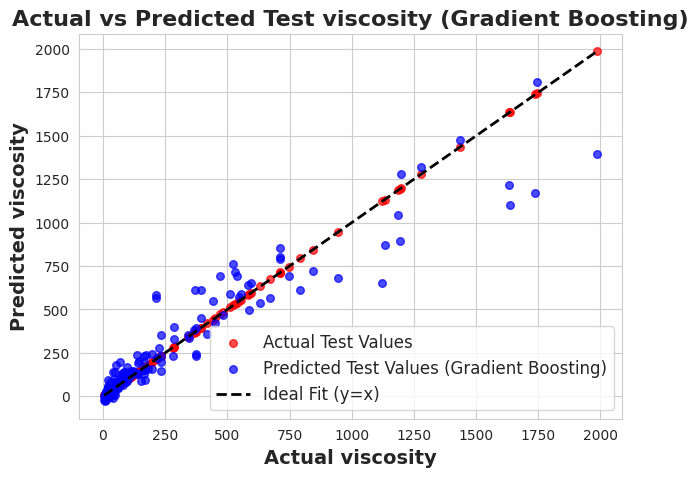

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set_style("whitegrid")

# Assuming these are the test set predictions and actual values for Random Forest
y_test_best = y_test  # Actual test values

# Get predictions for Random Forest (Assuming 'models' is defined from previous code)
rf_model = models["Gradient Boosting"]
y_test_pred_best = rf_model.predict(X_test)  # Predicted test values from the Random Forest

# Create figure
plt.figure(figsize=(7, 5))

# Scatter plots for actual and predicted test values
plt.scatter(y_test_best, y_test_best, color="red", label="Actual Test Values", alpha=0.7, s=30)
plt.scatter(y_test_best, y_test_pred_best, color="blue", label="Predicted Test Values (Gradient Boosting)", alpha=0.7, s=30)

# Reference diagonal line (Ideal Fit y=x)
x_vals = np.linspace(min(y_test_best), max(y_test_best), 100)
plt.plot(x_vals, x_vals, color="black", linestyle="--", linewidth=2, label="Ideal Fit (y=x)")

# Labels and title
plt.xlabel("Actual viscosity", fontsize=14, fontweight='bold')
plt.ylabel("Predicted viscosity", fontsize=14, fontweight='bold')
plt.title("Actual vs Predicted Test viscosity (Gradient Boosting)", fontsize=16, fontweight='bold')

# Improve legend
plt.legend(fontsize=12, loc="lower right")

# Show plot
plt.show()

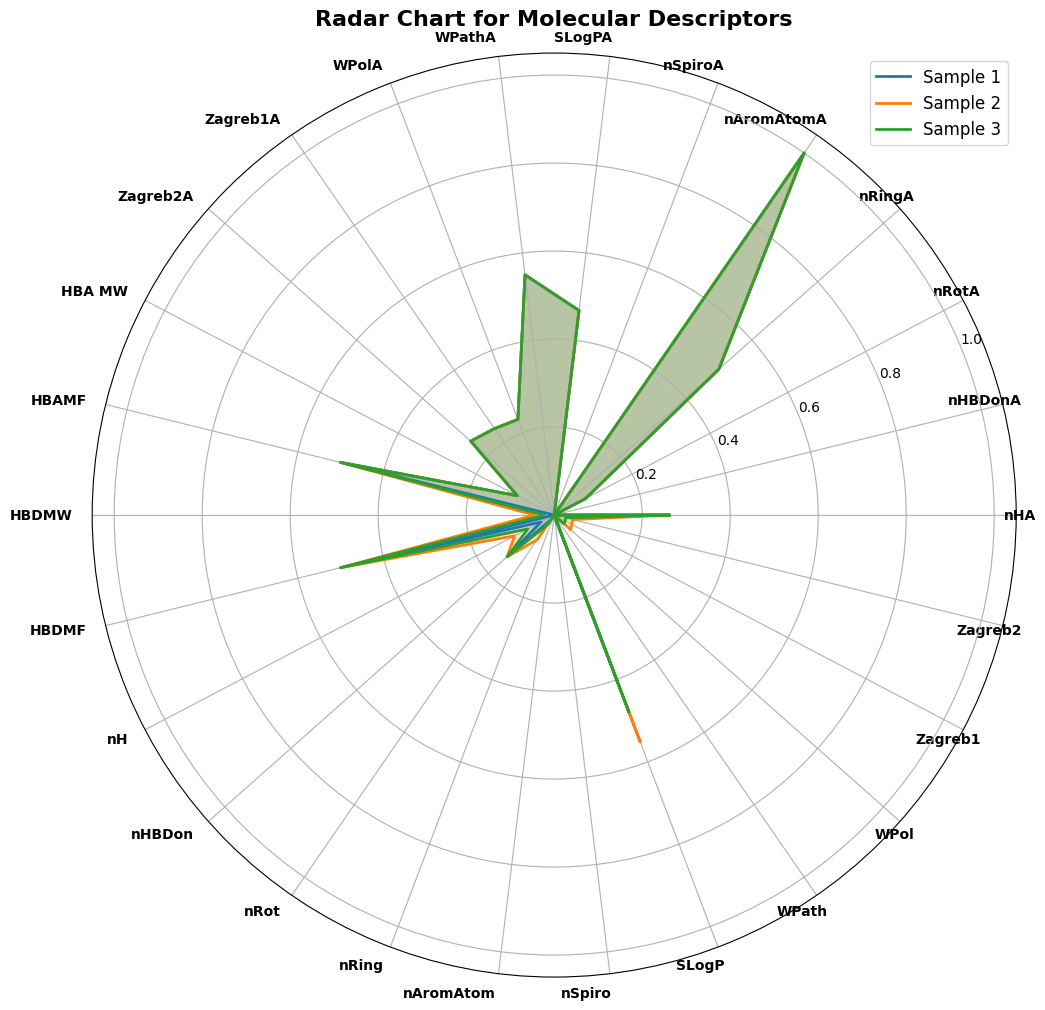

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Load dataset
file_path = "VISCOSITY.csv"  # Update with actual file path
df = pd.read_csv(file_path)

# Normalize the molecular descriptors
scaler = MinMaxScaler()
descriptor_columns = df.columns[:-2]  # Exclude target columns
df[descriptor_columns] = scaler.fit_transform(df[descriptor_columns])

# Select a few samples for radar chart
selected_samples = df.iloc[:3, :-2]  # Selecting all molecular descriptors
categories = list(selected_samples.columns)
N = len(categories)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]  # Close the loop

# Create Radar Chart
fig, ax = plt.subplots(figsize=(12, 12), subplot_kw={'polar': True})
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Using high-contrast colors
fills = ['#1f77b4', '#ff7f0e', '#2ca02c']

for i, row in selected_samples.iterrows():
    values = row.values.tolist()
    values += values[:1]  # Close the loop
    ax.plot(angles, values, color=colors[i], linewidth=2, label=f"Sample {i+1}")
    ax.fill(angles, values, alpha=0.2, color=fills[i])

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=10, rotation=45, ha='right', fontweight='bold')
ax.legend(fontsize=12, loc='upper right')
plt.title("Radar Chart for Molecular Descriptors", fontsize=16, fontweight='bold', pad=20)
plt.show()
